
     ANO  EMISSÃO DE CARBONO  DESASTRES
0   2012           27.842305         72
1   2013           24.911420        233
2   2014           27.196092         42
3   2015           25.039342         39
4   2016           26.581304         63
5   2017           27.337448         60
6   2018           47.711624         51
7   2019           22.058915         67
8   2020           24.837612         62
9   2021           25.717719         45
10  2022           21.064888         70

matriz de covariância:
[[ 0.02670283 -0.03308471]
 [-0.03308471  1.56129557]]

autovalores: [0.02598988 1.56200852]
autovetores: [[-0.9997679   0.02154426]
 [-0.02154426 -0.9997679 ]]
pca0: [-0.02539399  3.6840594  -0.71600472 -0.78402747 -0.23204758 -0.30151601
 -0.51890719 -0.13767892 -0.25421323 -0.64617786 -0.06809244]

pca1: [ 0.01195121  0.0243545  -0.0178208  -0.06898192 -0.02155767 -0.00563179
  0.45914013 -0.12372783 -0.06221304 -0.05038039 -0.1451324 ]

m: -1.7556928784019793e-18
b: 6.2764656925485474e-

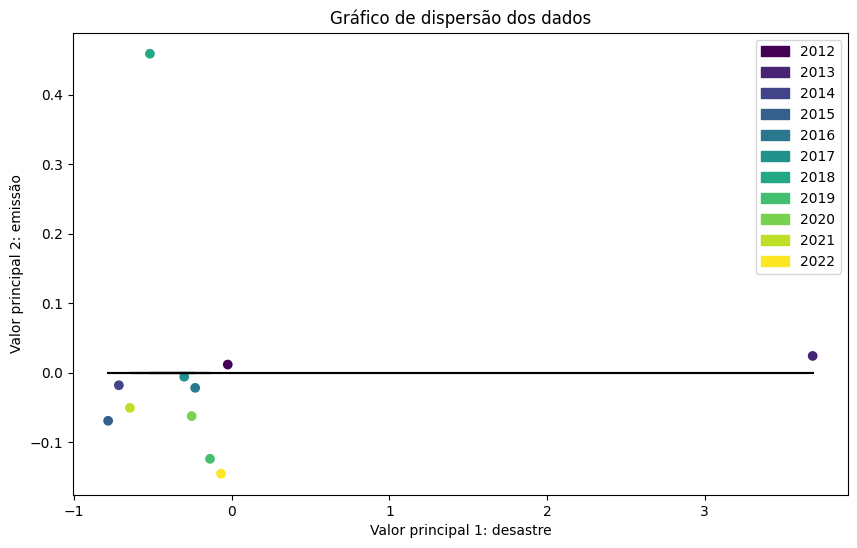

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


# Pegar dataset
novo = pd.read_excel('COVARIANCIA.xlsx', usecols=["ANO", 'EMISSÃO DE CARBONO', 'DESASTRES'])
novo["EMISSÃO DE CARBONO"] = novo["EMISSÃO DE CARBONO"].map(lambda x: x/1e15)
# multiplicando por trilhoes de toneladas = 1000*1000*1000*1000*1000

print(f"\n{novo}\n")


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
ex = novo.iloc[:, 1:].values
ey = novo.iloc[:, 0].values



# Covariancia e autovalores e autovetores
nex = imputer.fit_transform(ex)

nex = (nex - np.mean(nex))/np.std(nex)

covM = np.cov(nex.T)
print(f"matriz de covariância:\n{covM}\n")

eigVal, eigVec = np.linalg.eig(covM)
print(f"autovalores: {eigVal}")
print(f"autovetores: {eigVec}")



# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(nex)

xlinha = np.array(X_pca[:,0])
ylinha = np.array(X_pca[:,1])


print(f"pca0: {xlinha}\n")
print(f"pca1: {ylinha}\n")



# Plot
plt.figure(figsize=(10, 6))
plt.plot()

m, b = np.polyfit(xlinha, ylinha, 1)

print(f"m: {m}")
print(f"b: {b}")


label_map = {nome:i for i, nome in enumerate(np.unique(ey))}

y_numeric = np.array([label_map[nome] for nome in ey])

scatter = plt.scatter(xlinha, ylinha, c=y_numeric, cmap='viridis')
handles = [Patch(color=scatter.cmap(scatter.norm(label_map[nome])), label=nome) for nome in label_map]


plt.legend(handles=handles)
plt.xlabel('Valor principal 1: desastre')
plt.ylabel('Valor principal 2: emissão')

plt.title('Gráfico de dispersão dos dados')

plt.plot(xlinha, m*xlinha+b, "k")

plt.show()